In [1]:
import os
print(os.getcwd())


C:\Users\mahan\Project Image Classification


In [2]:
from zipfile import ZipFile

with ZipFile(r"C:\Users\mahan\OneDrive\Desktop\Projects\plant-seedlings-classification.zip", "r") as zip_ref:
    zip_ref.extractall(r"C:\Users\mahan\Project Image Classification")



In [3]:
import tensorflow as tf


# import tensorflow_hub as hub
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")



In [4]:
data_dir=r"C:\Users\mahan\Project Image Classification\plant-seedlings-classification\train"

In [5]:
# Kind of Leaves
kinds = np.array(os.listdir(data_dir))
print(f"Leaf in this dataset: {kinds}")

Leaf in this dataset: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [6]:

kinds = np.array([kind for kind in kinds if kind not in ['nonsegmentedv2']])

In [7]:

kinds


array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [8]:
# Paths of directories
path = data_dir
kind_path = [path + "/" + rice for rice in kinds]
kind_path

['C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Black-grass',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Charlock',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Cleavers',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Common Chickweed',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Common wheat',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Fat Hen',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Loose Silky-bent',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Maize',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Scentless Mayweed',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\

In [9]:
total_images=0
# Numbers of flowers for each kinds
for i, kind in enumerate(kind_path):
    print(f"There are {len(os.listdir(kind))} Rice in {kinds[i]}")
    total_images+=len(os.listdir(kind))

There are 263 Rice in Black-grass
There are 390 Rice in Charlock
There are 287 Rice in Cleavers
There are 611 Rice in Common Chickweed
There are 221 Rice in Common wheat
There are 475 Rice in Fat Hen
There are 654 Rice in Loose Silky-bent
There are 221 Rice in Maize
There are 516 Rice in Scentless Mayweed
There are 231 Rice in Shepherds Purse
There are 496 Rice in Small-flowered Cranesbill
There are 385 Rice in Sugar beet


In [10]:
print(total_images)

4750


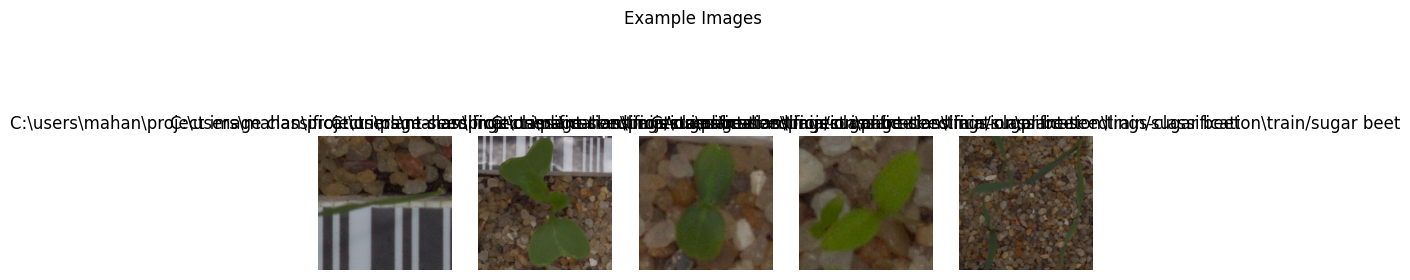

In [11]:
plt.figure(figsize=(10, 4))
plt.suptitle("Example Images")
num_kinds = len(kinds)
num_subplots = min(num_kinds, 5)
for i in range(num_subplots):
    ax = plt.subplot(1, num_subplots, i + 1)
    path = kind_path[i] + "/" + os.listdir(kind_path[i])[0]
    img = plt.imread(path)
    plt.imshow(img)
    plt.title(kind.capitalize())
    plt.axis("off")

plt.show()

In [12]:
# All ids
id_df = []
for i in range(len(kinds)):
    id = [img.split(".")[0] for img in os.listdir(kind_path[i])]
    id_df = id_df + id
len(id_df)

4750

In [13]:
# All kinds
kind_df = []
for i, kind in enumerate(kinds):
    for x in range(len(os.listdir(kind_path[i]))):
        kind_df.append(kind)
len(kind_df)

4750

In [14]:
# Create a dataframe
df = pd.DataFrame(columns=["id", "kind"])
df["id"] = id_df
df["kind"] = kind_df
df.tail()

,id,kind
4745,fc293eacb,Sugar beet
4746,fc441208c,Sugar beet
4747,fed9406b2,Sugar beet
4748,fef5e7066,Sugar beet
4749,ffa401155,Sugar beet


In [15]:
# Check numbers
df["kind"].value_counts()

kind
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: count, dtype: int64

In [16]:
filenames = []
for i in range(len(kinds)):
    file = [kind_path[i] + "/" + kind for kind in os.listdir(kind_path[i])]
    filenames = filenames + file
filenames[:5]

['C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Black-grass/0050f38b3.png',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Black-grass/0183fdf68.png',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Black-grass/0260cffa8.png',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Black-grass/05eedce4d.png',
 'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Black-grass/075d004bc.png']

In [17]:
# Check a random flower
print(filenames[2317])
print(df.loc[2317])

C:\Users\mahan\Project Image Classification\plant-seedlings-classification\train/Loose Silky-bent/1fcfb8677.png
id             1fcfb8677
kind    Loose Silky-bent
Name: 2317, dtype: object


In [18]:
boolean_kinds = [kind == kinds for kind in kind_df]
boolean_kinds[:5]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False])]

In [19]:
X = filenames
y = boolean_kinds

In [20]:
from sklearn.utils import shuffle
Xs, ys = shuffle(X, y,random_state=42)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Xs,
                                                    ys,
                                                    test_size=0.2,
                                                    random_state=18,
                                                    stratify=ys)
len(X_train), len(X_test), len(y_train), len(y_test)

(3800, 950, 3800, 950)

In [22]:
X_train[:3], y_train[:3]

(['C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Scentless Mayweed/9469abe24.png',
  'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Common Chickweed/2d4fc5fe9.png',
  'C:\\Users\\mahan\\Project Image Classification\\plant-seedlings-classification\\train/Fat Hen/5f6634fa4.png'],
 [array([False, False, False, False, False, False, False, False,  True,
         False, False, False]),
  array([False, False, False,  True, False, False, False, False, False,
         False, False, False]),
  array([False, False, False, False, False,  True, False, False, False,
         False, False, False])])

In [23]:
image = imread(filenames[15])
image.shape

(1417, 1417, 3)

In [24]:
image.max(), image.min()

(1.0, 0.0)

In [25]:
image[:2]

array([[[0.64705884, 0.64705884, 0.6431373 ],
        [0.6313726 , 0.6313726 , 0.627451  ],
        [0.6431373 , 0.64705884, 0.6431373 ],
        ...,
        [0.57254905, 0.5647059 , 0.56078434],
        [0.5686275 , 0.56078434, 0.5568628 ],
        [0.5686275 , 0.56078434, 0.5568628 ]],

       [[0.6431373 , 0.64705884, 0.6392157 ],
        [0.6392157 , 0.6431373 , 0.6392157 ],
        [0.654902  , 0.654902  , 0.654902  ],
        ...,
        [0.5686275 , 0.5647059 , 0.56078434],
        [0.5686275 , 0.56078434, 0.56078434],
        [0.5647059 , 0.56078434, 0.5568628 ]]], dtype=float32)

In [26]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 1417, 3), dtype=float32, numpy=
array([[[0.64705884, 0.64705884, 0.6431373 ],
        [0.6313726 , 0.6313726 , 0.627451  ],
        [0.6431373 , 0.64705884, 0.6431373 ],
        ...,
        [0.57254905, 0.5647059 , 0.56078434],
        [0.5686275 , 0.56078434, 0.5568628 ],
        [0.5686275 , 0.56078434, 0.5568628 ]],

       [[0.6431373 , 0.64705884, 0.6392157 ],
        [0.6392157 , 0.6431373 , 0.6392157 ],
        [0.654902  , 0.654902  , 0.654902  ],
        ...,
        [0.5686275 , 0.5647059 , 0.56078434],
        [0.5686275 , 0.56078434, 0.56078434],
        [0.5647059 , 0.56078434, 0.5568628 ]]], dtype=float32)>

In [39]:
img_size = 128

In [40]:
# Create a function for preprocessing images

def process_image(image_path, img_size=img_size):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

In [41]:
process_image(X[17]), tf.constant(y[17])

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
 array([[[0.6475645 , 0.6385341 , 0.64905024],
         [0.6420269 , 0.62856925, 0.63810533],
         [0.637057  , 0.63606125, 0.6439044 ],
         ...,
         [0.57281744, 0.56078434, 0.5675705 ],
         [0.5754749 , 0.5762334 , 0.56839025],
         [0.5622857 , 0.5561812 , 0.54560375]],
 
        [[0.6188027 , 0.6306287 , 0.63847184],
         [0.6297449 , 0.6382998 , 0.64685476],
         [0.6147762 , 0.61371917, 0.62236744],
         ...,
         [0.5679282 , 0.5701102 , 0.57184976],
         [0.5679157 , 0.5639941 , 0.5630597 ],
         [0.5654644 , 0.55762124, 0.5561656 ]],
 
        [[0.5575595 , 0.55291057, 0.566728  ],
         [0.55161166, 0.53287697, 0.55379367],
         [0.5727207 , 0.5549205 , 0.557013  ],
         ...,
         [0.5650123 , 0.5650123 , 0.5600552 ],
         [0.5662801 , 0.5653457 , 0.55682   ],
         [0.58078986, 0.56902516, 0.5765386 ]],
 
        ...,
 
        [[0.35655636, 0.27414215

In [42]:
# Create a simple function to return a tuple (image, label)
def get_image_label (image_path, label):
  image = process_image(image_path)
  return image, label

In [43]:
batch_size = 32

In [44]:
# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=batch_size, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch
    else:
        print("Creating data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(batch_size)
        return data_batch

In [45]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
test_data = create_data_batches(X_test, test_data=True)

Creating data batches...
Creating test data batches...


In [46]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images[:2], train_labels[:2]

(array([[[[0.71888787, 0.71055454, 0.7147059 ],
          [0.8291974 , 0.82585794, 0.8378218 ],
          [0.822978  , 0.8320466 , 0.8514094 ],
          ...,
          [0.48319548, 0.33638176, 0.17837012],
          [0.4635264 , 0.3137255 , 0.17250307],
          [0.34780943, 0.23849572, 0.18408395]],
 
         [[0.7170037 , 0.7059283 , 0.7137255 ],
          [0.8057292 , 0.7958947 , 0.8076594 ],
          [0.8306067 , 0.8301012 , 0.8492495 ],
          ...,
          [0.32867646, 0.22743568, 0.15784314],
          [0.38301167, 0.2945619 , 0.23979782],
          [0.35712317, 0.27173716, 0.23178616]],
 
         [[0.7144608 , 0.70661765, 0.7115196 ],
          [0.8136796 , 0.8124541 , 0.820527  ],
          [0.8279106 , 0.8303616 , 0.8491269 ],
          ...,
          [0.37244183, 0.32930455, 0.29324448],
          [0.37504598, 0.32041973, 0.2851103 ],
          [0.4085785 , 0.34836093, 0.29860604]],
 
         ...,
 
         [[0.7643076 , 0.776149  , 0.7952666 ],
          [0.82795

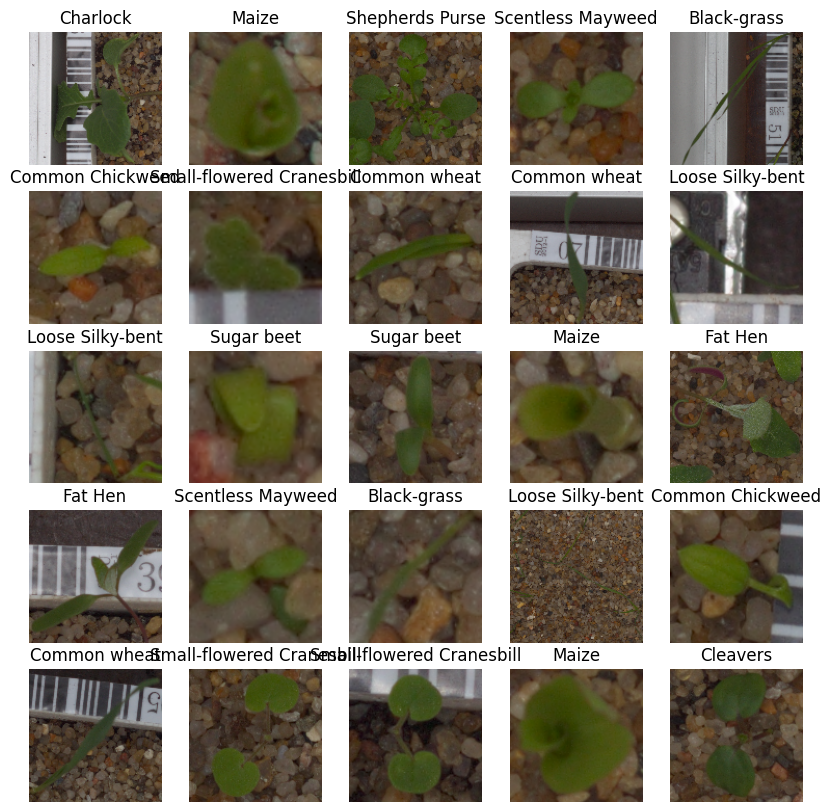

In [47]:
# Visualizing data batches
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(kinds[train_labels[i].argmax()])
    plt.axis("off")

In [49]:
!pip install tensorflow_hub
import tensorflow_hub as hub
# Setup input shape to the model
input_shape = [None, img_size, img_size, 3] # batch, height, width, colour channels

# Setup output shape of our model
output_shape = len(kinds)

model_url="https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


import tensorflow as tf
import tensorflow_hub as hub

# 1) Define the input tensor
inputs = tf.keras.Input(shape=(128, 128, 3))

# 2) Apply the TF‑Hub feature vector (no top)
x = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/mobilenet_v2_100_128/feature_vector/4",
    trainable=False   # freeze the backbone
)(inputs)

# 3) Add your own dense head
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

# 4) Final classification layer for 12 classes
outputs = tf.keras.layers.Dense(12, activation='softmax')(x)

# 5) Build the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()



In [60]:
import tensorflow as tf

# 1) Load the MobileNetV2 base (feature extractor) directly
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet', 
    include_top=False,
    input_shape=(128, 128, 3),
    pooling='avg'          # global average pool to get a vector
)
base_model.trainable = False   # freeze it

# 2) Build your head on top
inputs = tf.keras.Input(shape=(128,128,3))
x = base_model(inputs, training=False)        # note: we pass training=False to avoid BN updates
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(12, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_128 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,920,012 (11.14 MB)

 Trainable params: 662,028 (2.53 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [61]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)

# 1) Choose your optimizer, loss, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss      = 'sparse_categorical_crossentropy'   # or 'categorical_crossentropy' if your labels are one‑hot
metrics   = ['accuracy']

# 2) Compile the model
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

# 3) Now you can train
history = model.fit(
    train_data,
    epochs=150,
    callbacks=[early_stopping],
    validation_data=val_data      # if you have a validation split or dataset
)


In [63]:
# Compile for one-hot labels
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Then train
history = model.fit(
    train_data,      # yields (images, one_hot_labels)
    epochs=15,
    callbacks=[early_stopping]
)


Epoch 1/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 29s 213ms/step - accuracy: 0.2003 - loss: 2.5229
Epoch 2/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 213ms/step - accuracy: 0.4992 - loss: 1.5164
Epoch 3/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 211ms/step - accuracy: 0.5929 - loss: 1.2213
Epoch 4/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 228ms/step - accuracy: 0.6591 - loss: 1.0192
Epoch 5/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 219ms/step - accuracy: 0.6923 - loss: 0.9149
Epoch 6/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 209ms/step - accuracy: 0.7186 - loss: 0.8440
Epoch 7/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 211ms/step - accuracy: 0.7660 - loss: 0.7328
Epoch 8/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 26s 214ms/step - accuracy: 0.7733 - loss: 0.6735
Epoch 9/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 224ms/step - accuracy: 0.7978 - loss: 0.6314
Epoch 10/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 228ms/step - accuracy: 0.8216 - loss: 0.5739
Epoch 11/15
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 210ms/step - accuracy: 0.8205 - loss: 0.5539
Epoch 12/15
119/119

In [64]:
predictions = model.predict(test_data)
predictions

30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step


array([[3.56834009e-03, 1.28105178e-01, 2.62136757e-02, ...,
        5.95298503e-03, 5.80704570e-01, 1.15186995e-05],
       [5.64253144e-02, 2.84248326e-05, 4.79013514e-04, ...,
        1.34680991e-03, 1.96670787e-03, 7.50803447e-04],
       [6.99054567e-07, 2.68203032e-04, 9.99549091e-01, ...,
        3.65929700e-05, 1.17334719e-06, 1.14871295e-06],
       ...,
       [1.83101408e-02, 3.76839493e-03, 2.03064810e-02, ...,
        4.12071705e-01, 1.20321782e-02, 4.87733819e-03],
       [1.07738728e-04, 2.67594936e-04, 9.98370469e-01, ...,
        1.51681015e-04, 7.08768994e-06, 2.40712834e-05],
       [4.12975460e-05, 3.61371312e-05, 1.88416481e-04, ...,
        1.02113665e-03, 3.94869749e-05, 3.80813464e-04]], dtype=float32)

In [65]:
true_labels = [kinds[np.argmax(data)] for data in y_test]
pred_labels = [kinds[np.argmax(pred)] for pred in predictions]

In [66]:
true_labels[:5]

['Small-flowered Cranesbill', 'Fat Hen', 'Cleavers', 'Fat Hen', 'Fat Hen']

In [67]:
pred_labels[:5]

['Small-flowered Cranesbill',
 'Loose Silky-bent',
 'Cleavers',
 'Fat Hen',
 'Fat Hen']

In [68]:
print(accuracy_score(true_labels, pred_labels))

0.7778947368421053


In [69]:
# Create a function to save a model.
def save_model(model,suffix=None):

  # Create a model directory pathname with current time
  modeldir = "/content/drive/MyDrive/plant_leaf"
  model_path =modeldir+"-"+ suffix +".h5"  # save format of model
  print(f"Saving model to:{model_path}...")
  model.save(model_path)
  return model_path

In [70]:
save_model(model,"Mobilenet_v2")

Saving model to:/content/drive/MyDrive/plant_leaf-Mobilenet_v2.h5...


'/content/drive/MyDrive/plant_leaf-Mobilenet_v2.h5'

prediction using saved model

In [71]:
import tensorflow_hub as hub

saved_model = tf.keras.models.load_model('/content/drive/MyDrive/plant_leaf-Mobilenet_v2.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [72]:
predictions_saved = saved_model.predict(test_data)
predictions_saved

30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step


array([[3.56834009e-03, 1.28105178e-01, 2.62136757e-02, ...,
        5.95298503e-03, 5.80704570e-01, 1.15186995e-05],
       [5.64253144e-02, 2.84248326e-05, 4.79013514e-04, ...,
        1.34680991e-03, 1.96670787e-03, 7.50803447e-04],
       [6.99054567e-07, 2.68203032e-04, 9.99549091e-01, ...,
        3.65929700e-05, 1.17334719e-06, 1.14871295e-06],
       ...,
       [1.83101408e-02, 3.76839493e-03, 2.03064810e-02, ...,
        4.12071705e-01, 1.20321782e-02, 4.87733819e-03],
       [1.07738728e-04, 2.67594936e-04, 9.98370469e-01, ...,
        1.51681015e-04, 7.08768994e-06, 2.40712834e-05],
       [4.12975460e-05, 3.61371312e-05, 1.88416481e-04, ...,
        1.02113665e-03, 3.94869749e-05, 3.80813464e-04]], dtype=float32)

In [73]:
predictions_saved[0]

array([3.56834009e-03, 1.28105178e-01, 2.62136757e-02, 2.28742629e-01,
       1.62562181e-04, 2.05917880e-02, 1.79683999e-03, 3.35778896e-04,
       3.81415058e-03, 5.95298503e-03, 5.80704570e-01, 1.15186995e-05],
      dtype=float32)

In [74]:
true_labels_saved = [kinds[np.argmax(data)] for data in y_test]
pred_labels_saved = [kinds[np.argmax(pred)] for pred in predictions_saved]

In [75]:
print(accuracy_score(true_labels_saved, pred_labels_saved))

0.7778947368421053


In [76]:
pred_labels_saved[0]

'Small-flowered Cranesbill'

In [77]:
# Create a function for preprocessing images
def process_image(image_path, img_size=img_size):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])
  image = tf.expand_dims(image, axis=0)

  return image

In [85]:
imgpath = "C:/Users/mahan/Project Image Classification/plant-seedlings-classification/train/Loose Silky-bent/1fcfb8677.png"
# C:\Users\mahan\Project Image Classification\plant-seedlings-classification\train/Loose Silky-bent/1fcfb8677.png
imglabel="Loose Silky-bent"

In [86]:
img=process_image(imgpath)

In [87]:
img.shape

TensorShape([1, 128, 128, 3])

In [88]:
pred_label=saved_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [89]:
pred_label =kinds[np.argmax(pred_label)]

In [90]:
pred_label,imglabel

('Loose Silky-bent', 'Loose Silky-bent')